In [8]:
# environment set up
import tensorflow as tf
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Reshape, Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
import os
import random
import pandas as pd

# working folder
# directory = "/Users/Srikar/Desktop/Velexi/spectra-ml/data"
directory = os.environ['DATA_DIR']
os.chdir(directory)

# print(os.getcwd())

In [9]:
dataset = os.path.join(directory,"dataset3")
num_samples = len([name for name in os.listdir(dataset) if \
                   os.path.isfile(os.path.join(dataset,name))])

print(num_samples)

33


In [3]:
spectrum_len = 480
spectra = np.zeros((num_samples,spectrum_len))

spectrum_categories = np.zeros(num_samples)
first_record_of_mixtures_chapter = 11602
is_a_mineral = 1                                   # these numbers match the chapter numbers given by usgs
is_a_mixture = 2
spectrum_names = ["" for x in range(num_samples)]

y = np.zeros((num_samples, 1))

os.chdir(dataset)

i = 0

for filename in os.listdir(dataset):
    file_object  = open(filename, 'r').readlines()
#     strip off header, add to matrix 'spectra'
    spectra[i,:] = file_object[1:]

#     label spectrum class, based on header
#     actinolite: 0, alunite: 1, chlorite: 2
    material_name = file_object[0]
    
    spectrum_names[i] = material_name
    
    start = 'Record='
    end = ':'
    record_number = int((material_name.split(start))[1].split(end)[0])
    # print(record_number)
    if record_number < first_record_of_mixtures_chapter:
        spectrum_categories[i] = is_a_mineral
    else:
        spectrum_categories[i] = is_a_mixture

#     print(material_name)

    if material_name.find('Actinolite',) != -1: # if material name contains actinolite
        y[i,0] = 0
    elif material_name.find('Alun',)!= -1:
        y[i,0] = 1
    else: # chlorite
        y[i,0] = 2

#     turn missing points into 0
    for j in range(spectrum_len):
        if spectra[i,j] < 0:
            spectra[i,j] = 0
    i+=1

In [4]:
sample_indices = list(range(0, num_samples))
print(num_samples)
random.shuffle(sample_indices)
train_set_size = 3*(num_samples//5)
dev_set_size = (num_samples//5)
test_set_size= num_samples-dev_set_size - train_set_size
print(train_set_size)
print(test_set_size)
print(dev_set_size)
train_set_indices = sample_indices[:train_set_size]
dev_set_indices = sample_indices[train_set_size: train_set_size+dev_set_size]
test_set_indices= sample_indices[train_set_size+dev_set_size: num_samples]
print(train_set_indices)
print(test_set_indices)
print(dev_set_indices)

train_set = spectra[train_set_indices, :]
train_labels = y[train_set_indices, :]
dev_set = spectra[dev_set_indices, :]
dev_labels = y[dev_set_indices, :]
test_set = spectra[test_set_indices, :]
test_labels = y[test_set_indices, :]

33
18
9
6
[9, 23, 13, 21, 19, 10, 29, 15, 14, 16, 8, 12, 0, 4, 22, 18, 20, 28]
[31, 3, 30, 32, 27, 2, 11, 5, 25]
[7, 1, 26, 24, 17, 6]


In [5]:
train_labels = train_labels.flatten()
dev_labels = dev_labels.flatten()
test_labels = test_labels.flatten()
# type(train_labels)

In [6]:
# len(train_set)
# len(train_set[17])
print(test_set.shape)

(9, 480)


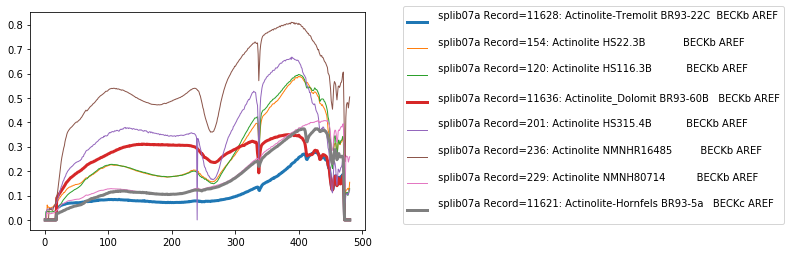

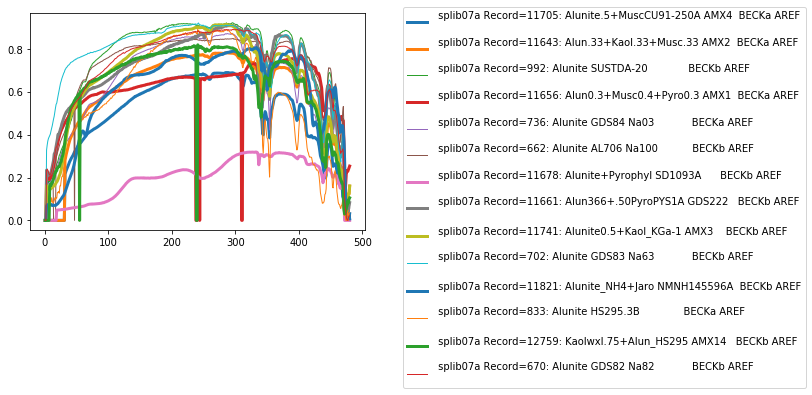

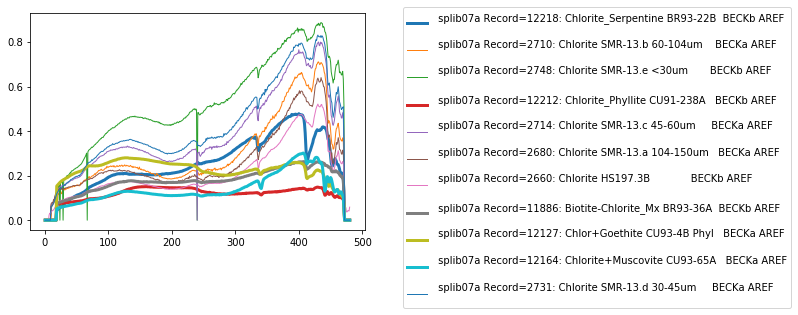

In [7]:
# --- plot the classes

# plot each class in a separate plot
# plot spectra names in legend
# plot minerals and mixtures w diff line widths

mineral_names = ["Actinolite", "Alunite", "Chlorite"]

# variables
num0 = 0 #number of samples of class 0
num1 = 0
num2 = 0

mineral_linewidth = 1         # linewidth = 1 is default
mixture_linewidth = 3         

# count the number of each class to make spectra0, spectra1, spectra2 databases
for i in range(num_samples):
    if y[i,0]== 0:
        num0 += 1
    elif y[i,0]== 1:
        num1 += 1
    elif y[i,0]== 2:
        num2 += 1

# make class-specific databases spectra0, ...1, ...2
spectra0 = np.zeros((num0,spectrum_len))
spectra1 = np.zeros((num1,spectrum_len)) 
spectra2 = np.zeros((num2,spectrum_len)) 

labels0 = ["" for x in range(num0)]
labels1 = ["" for x in range(num1)]
labels2 = ["" for x in range(num2)]

linewidth0 = np.zeros(num0)
linewidth1 = np.zeros(num1)
linewidth2 = np.zeros(num2)


# make counters for each database to place spectra
i0 = 0
i1 = 0
i2 = 0

# set linewidth for the spectrum 
# populate class-specific databases spectra0, ...1, ...2
for i in range(num_samples):
    
    # set linewidth
    #testcode
    #print(spectrum_categories)
    #print(spectrum_categories[i])
    
    if spectrum_categories[i] == is_a_mineral:
        linewidth = mineral_linewidth
        
        #testcode
        #print('min')
    else: 
        linewidth = mixture_linewidth
        
        #testcode
        #print('mix')
    
    # populate matrices for making each class plot
    if y[i,0]== 0:
        spectra0[i0,:] = spectra[i,:]
        labels0[i0] = spectrum_names[i]
        linewidth0[i0] = linewidth
        i0 +=1
    elif y[i,0]== 1:
        spectra1[i1,:] = spectra[i,:]
        labels1[i1] = spectrum_names[i]
        linewidth1[i1] = linewidth
        i1 +=1
    else:
        spectra2[i2,:] = spectra[i,:]
        labels2[i2] = spectrum_names[i]
        linewidth2[i2] = linewidth
        i2 +=1

# plot each class-specific database separately
for i in range(i0):
#     fig = plt.figure()
    plt.plot(range(1, spectrum_len+1), spectra0[i,:], label = labels0[i], linewidth = linewidth0[i]) # remove linewidth for all mixtures/minerals to be standard
#     plt.xticks([])
#     plt.yticks([])
#     plt.show()
#     path = "/Users/Srikar/Desktop/Velexi/spectra-ml/lab-notebook/smunukutla/plots/" + mineral_names[0] + str(i) + ".png"
#     fig.savefig(path, format = "PNG")
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.show()

for i in range(i1):
    plt.plot(range(1, spectrum_len+1), spectra1[i,:], label = labels1[i], linewidth = linewidth1[i])
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.show()

for i in range(i2):
    plt.plot(range(1, spectrum_len+1), spectra2[i,:], label = labels2[i], linewidth = linewidth2[i])
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.show()

In [8]:
train_set = np.reshape(train_set, (train_set.shape[0], 480, 1))
dev_set = np.reshape(dev_set, (dev_set.shape[0], 480, 1))
test_set = np.reshape(test_set, (test_set.shape[0], 480, 1))

train_labels = np.reshape(train_labels, (train_labels.shape[0], 1))
dev_labels = np.reshape(dev_labels, (dev_labels.shape[0], 1))
test_labels = np.reshape(test_labels, (test_labels.shape[0], 1))

train_labels = to_categorical(train_labels)
dev_labels = to_categorical(dev_labels)
test_labels = to_categorical(test_labels)

In [9]:
print(train_labels)

[[0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]]


In [10]:
model = Sequential()
# model.add(Reshape((TIME_PERIODS, num_sensors), input_shape=(input_shape,)))
model.add(Conv1D(64, 25, activation='relu', input_shape=(train_set.shape[1], 1)))
model.add(Conv1D(64, 25, activation='relu'))
model.add(MaxPooling1D(4)) # 108 by 64 so far
model.add(Conv1D(100, 25, activation='relu'))
model.add(Conv1D(100, 25, activation='relu'))
model.add(MaxPooling1D(4))
# model.add(Dropout(0.5))
# model.add(GlobalAveragePooling1D())
model.add(Flatten())
model.add(Dense(3, activation='softmax'))
print(model.summary())

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 456, 64)           1664      
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 432, 64)           102464    
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 108, 64)           0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 84, 100)           160100    
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 60, 100)           250100    
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 15, 100)           0         
_________________________________________________________________
flat

In [11]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

BATCH_SIZE = 12
EPOCHS = 50

print(train_labels.shape)
model.fit(train_set, train_labels, batch_size=BATCH_SIZE, epochs=EPOCHS, verbose=1, validation_data=(dev_set, dev_labels)) 

(18, 3)
Instructions for updating:
Use tf.cast instead.
Train on 18 samples, validate on 6 samples
Epoch 1/50
18/18 [==============================] - 1s 43ms/step - loss: 1.0930 - acc: 0.4444 - val_loss: 0.9175 - val_acc: 0.5000
Epoch 2/50
18/18 [==============================] - 0s 12ms/step - loss: 0.9313 - acc: 0.4444 - val_loss: 0.8363 - val_acc: 0.5000
Epoch 3/50
18/18 [==============================] - 0s 26ms/step - loss: 0.9473 - acc: 0.4444 - val_loss: 0.7715 - val_acc: 0.5000
Epoch 4/50
18/18 [==============================] - 0s 20ms/step - loss: 0.8513 - acc: 0.4444 - val_loss: 0.7394 - val_acc: 0.5000
Epoch 5/50
18/18 [==============================] - 0s 15ms/step - loss: 0.8244 - acc: 0.5556 - val_loss: 0.6974 - val_acc: 0.5000
Epoch 6/50
18/18 [==============================] - 0s 11ms/step - loss: 0.7982 - acc: 0.6111 - val_loss: 0.6508 - val_acc: 0.5000
Epoch 7/50
18/18 [==============================] - 0s 12ms/step - loss: 0.7272 - acc: 0.6667 - val_loss: 0.6492 - 

In [12]:
y_pred = model.predict(test_set)
y_pred

array([[2.96105037e-16, 1.00000000e+00, 9.26330838e-33],
       [3.57077028e-07, 1.22979351e-18, 9.99999642e-01],
       [1.03080885e-04, 5.80538001e-15, 9.99896884e-01],
       [5.78593855e-18, 1.00000000e+00, 1.23977247e-37],
       [9.97705281e-01, 3.45126842e-04, 1.94957631e-03],
       [2.98792600e-08, 5.98167970e-20, 1.00000000e+00],
       [3.66342057e-22, 1.00000000e+00, 0.00000000e+00],
       [9.16677038e-07, 9.78958949e-19, 9.99999046e-01],
       [6.83434049e-13, 3.70315656e-14, 1.00000000e+00]], dtype=float32)

In [13]:
test_labels

array([[0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.]], dtype=float32)

In [14]:
model.evaluate(test_set, test_labels)

9/9 [==============================] - 0s 4ms/step


[5.678462982177734, 0.5555555820465088]